# Experimentación

In [3]:
%load_ext autoreload
%autoreload 2

In [11]:
import main
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
cake_size = 100
num_iters = 1000
debug = False

In [13]:
vals = main.flavor_valuation_identity()

strats = [main.P1_STRAT_INCOMPLETE, main.P1_STRAT_COMPLETE, main.P1_STRAT_HALF]

valuations = [
    main.flavor_valuation_identity(),
    main.flavor_valuation_inverse(),
    main.flavor_valuation_inverse_eq(),
    #main.flavor_valuation_id_eq(),
    #main.flavor_valuation_eq(), # análogo a identity?
]

all_pairs = []
for strat in strats:
    for val in valuations:
        all_pairs.append((strat, val))

In [15]:
records = []
for strat, val in tqdm(all_pairs):
    game = main.CutAndChoose(debug=debug, vals=val, quiet=True, p1_strat=strat)
    r = game.play(cake_size, num_iters)
    records.extend(r)

df = pd.DataFrame()
df = df.from_records(records)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.13s/it]


In [22]:
df.to_csv("results.csv")

In [23]:
df = pd.read_csv("results.csv")

In [30]:
df

,Unnamed: 0,p1,p2,val,p1_strat,cut,iter,p1_total,p2_total
0,0,0.500000,0.500000,identity,incomplete,52,0,0.500000,0.500000
1,1,0.500000,0.500000,identity,incomplete,47,1,1.000000,1.000000
2,2,0.500000,0.500000,identity,incomplete,57,2,1.500000,1.500000
3,3,0.496241,0.503759,identity,incomplete,53,3,1.996241,2.003759
4,4,0.496124,0.503876,identity,incomplete,52,4,2.492365,2.507635
...,...,...,...,...,...,...,...,...,...
8995,8995,0.500000,0.529412,inverse eq,half,50,995,457.897920,539.487908
8996,8996,0.355140,0.600000,inverse eq,half,50,996,458.253060,540.087908
8997,8997,0.447154,0.508772,inverse eq,half,50,997,458.700214,540.596680
8998,8998,0.439024,0.529412,inverse eq,half,50,998,459.139239,541.126091


<AxesSubplot:xlabel='cut', ylabel='Count'>

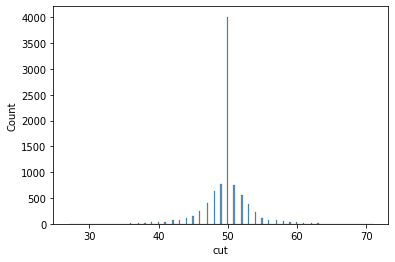

In [24]:
sns.histplot(df["cut"])

KeyboardInterrupt: 

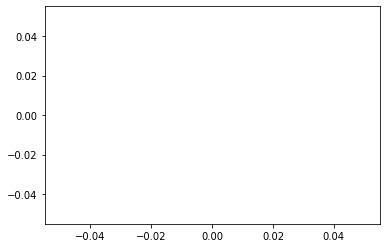

In [25]:
sns.lineplot(data=df, y="p1_total", x="iter", hue="p1_strat")

<AxesSubplot:>

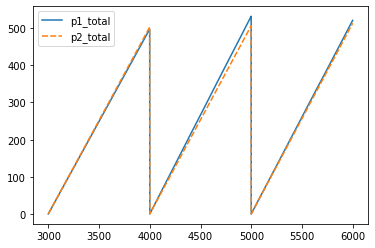

In [26]:
df_strat = df[df["p1_strat"]==main.P1_STRAT_COMPLETE]
sns.lineplot(data=df_strat[["p1_total", "p2_total"]])

<AxesSubplot:>

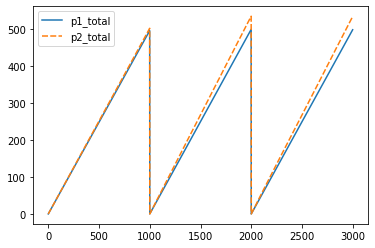

In [27]:
df_strat = df[df["p1_strat"]==main.P1_STRAT_INCOMPLETE]
sns.lineplot(data=df_strat[["p1_total", "p2_total"]])

<AxesSubplot:>

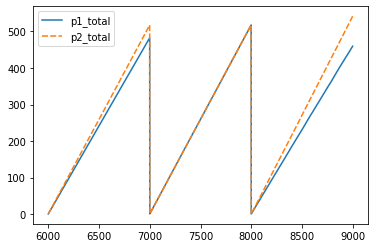

In [28]:
df_strat = df[df["p1_strat"]==main.P1_STRAT_HALF]
sns.lineplot(data=df_strat[["p1_total", "p2_total"]])

/home/mnpanic/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


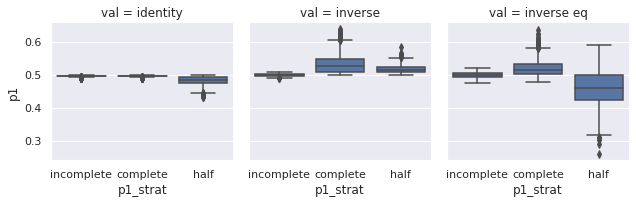

In [37]:
# https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.FacetGrid(data=df, col="val")
g.map(sns.boxplot, "p1_strat", "p1")
#sns.boxplot(data=df[["p1", "p1_strat"]], x="p1_strat", y="p1")